In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [138]:
#1
apartament_pv = 120000      # początkowa wartość mieszkania
rate_1 = 0.05               # stopa procentowa w skali roku
years_1 = 5                 # liczba lat
freq_1 = 1                  # ilość kapitalizacji w roku
nper_1 = years_1 * freq_1   # łączna ilość kapitalizacji
months = years_1 * 12

apartament_fv = np.around((apartament_pv * (1 + rate_1)**nper_1),2)

monthly_value = (apartament_fv - apartament_pv)/months
monthly_increase = np.zeros(months) + monthly_value
balance = np.zeros(months) + apartament_pv
apartament_prices = np.around(balance + np.cumsum(monthly_increase),2)

print(f"Cena mieszkania za {years_1} lat wyniesie: {apartament_fv} zł")

Cena mieszkania za 5 lat wyniesie: 153153.79 zł


In [223]:
#2
deposit_pv = 0            # kapitał początkowy
deposit_fv = 153153.79    # kapitał końcowy
rate_2 = 0.12             # stopa procentowa w skali roku
years_2 = 5               # liczba lat
freq_2 = 12               # ilość kapitalizacji w roku

rate_2 /= freq_2          # miesięczna stopa procentowa
nper_2 = years_2 * freq_2 # łączna ilość kapitalizacji

monthly_payment = - np.around(npf.pmt(rate_2, nper_2, deposit_pv, deposit_fv), 2)

periods = np.arange(nper_2)
deposit_values = np.around(npf.fv(rate_2, periods, deposit_pv, -monthly_payment), 2)

print(f"Stała miesięczna wpłata przy określonych założeniach wynosi {monthly_payment} zł")

Stała miesięczna wpłata przy określonych założeniach wynosi 1875.28 zł


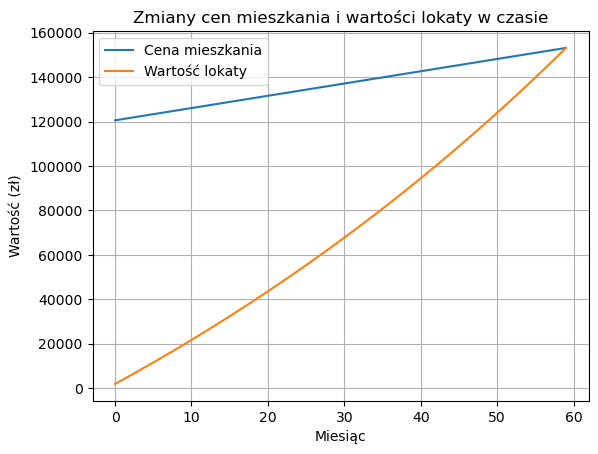

In [224]:
#3
plt.plot(range(months), apartament_prices, label='Cena mieszkania')
plt.plot(range(nper_2), deposit_values.cumsum(), label='Wartość lokaty')
plt.xlabel('Miesiąc')
plt.ylabel('Wartość (zł)')
plt.title('Zmiany cen mieszkania i wartości lokaty w czasie')
plt.legend()
plt.grid(True)
plt.show()